# DEFINING THE QUESTION

## a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

---

## b) Defining the Metric for Success

Being able to predict if a patient has hypothyroid

---

## c) Understanding the Context

Hypothyroidism is a condition in which the thyroid gland doesn't produce enough thyroid hormone. This deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women. Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain. However, Hypothyroidism may not cause noticeable symptoms in the early stages.
Treatment consists of thyroid hormone replacement.

---

## d) Experimental Design

1. Read and explore the given dataset.
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate and bivariate analysis recording your observations.
4. Perform Exploratory Data Analysis.
5. Performing Analysis using Desicion Trees.
6. Performing Analysis using Support Vector Machines (SVM).
6. Provide a recommendation based on the analysis. 
7. Challenge the solution by providing insights on how improvements can be made.  

---

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

In [2]:
thyroid = pd.read_csv('/content/hypothyroid.csv')
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
thyroid.shape

(3163, 26)

In [4]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# DATA CLEANING

In [5]:
thyroid.isna().value_counts()
#no null values.

status  age    sex    on_thyroxine  query_on_thyroxine  on_antithyroid_medication  thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick   tumor  lithium  goitre  TSH_measured  TSH    T3_measured  T3     TT4_measured  TT4    T4U_measured  T4U    FTI_measured  FTI    TBG_measured  TBG  
False   False  False  False         False               False                      False            False              False               False     False  False  False    False   False         False  False        False  False         False  False         False  False         False  False         False    3163
dtype: int64

In [6]:
thyroid.duplicated().value_counts()

# This shows that there are possibbly 77 duplicated records, let's view them.

False    3086
True       77
dtype: int64

In [7]:
thyroid[thyroid.duplicated()].head(50)

# The records show that even though some symptoms are duplicated, the ages and the other symptoms
# indicate they are different records.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
132,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,7.30,y,2.40,y,66,y,1.09,y,61,n,?
135,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,65,y,0.70,y,28,y,1,y,28,n,?
138,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,t,y,35,y,2,y,19,y,0.95,y,20,n,?
145,hypothyroid,60,F,f,f,f,f,f,f,f,f,f,f,t,y,12,y,2.20,y,71,y,1.40,y,51,n,?
146,hypothyroid,78,F,f,f,f,f,f,f,f,f,f,f,f,y,28,y,0.20,y,17,y,1.01,y,16,n,?


In [8]:
thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [9]:
# Since all columns are objects, we need to convert them for analysis, but before that, we need to deal with the ?s

thyroid.age.replace(to_replace='?', value='0',inplace= True)
thyroid.age = thyroid.age.astype(int)

In [10]:
age_mean = thyroid[thyroid.age != 0]
age_mean = age_mean.age.mean()
age_mean

51.154214206845786

In [11]:
thyroid.age.replace(to_replace= 0, value = 51, inplace= True)

# Now we've fixed the age column, since the ? were missing values that did not show
# when we considered the column as an object.

In [12]:
# Lets do the same to the other columns that should be numerical, i.e. TSH, T3, TT4, T4U, FTI and TBG

thyroid.TSH.replace(to_replace='?', value='0',inplace= True)
thyroid.T3.replace(to_replace='?', value='0',inplace= True)
thyroid.TT4.replace(to_replace='?', value='0',inplace= True)
thyroid.T4U.replace(to_replace='?', value='0',inplace= True)
thyroid.FTI.replace(to_replace='?', value='0',inplace= True)
thyroid.TBG.replace(to_replace='?', value='0',inplace= True)

thyroid.TSH = thyroid.TSH.astype(float)
thyroid.T3 = thyroid.T3.astype(float)
thyroid.TT4 = thyroid.TT4.astype(float)
thyroid.T4U = thyroid.T4U.astype(float)
thyroid.FTI = thyroid.FTI.astype(float)
thyroid.TBG = thyroid.TBG.astype(float)

In [13]:
TSH_mean = thyroid[thyroid.TSH != 0]
TSH_mean = TSH_mean.TSH.mean()
T3_mean = thyroid[thyroid.T3 != 0]
T3_mean = T3_mean.T3.mean()
TT4_mean = thyroid[thyroid.TT4 != 0]
TT4_mean = TT4_mean.TT4.mean()
T4U_mean = thyroid[thyroid.T4U != 0]
T4U_mean = T4U_mean.T4U.mean()
FTI_mean = thyroid[thyroid.FTI != 0]
FTI_mean = FTI_mean.FTI.mean()
TBG_mean = thyroid[thyroid.TBG != 0]
TBG_mean = TBG_mean.TBG.mean()

In [14]:
thyroid.TSH.replace(to_replace= 0, value = TSH_mean, inplace= True)
thyroid.T3.replace(to_replace= 0, value = T3_mean, inplace= True)
thyroid.TT4.replace(to_replace= 0, value = TT4_mean, inplace= True)
thyroid.T4U.replace(to_replace= 0, value = T4U_mean, inplace= True)
thyroid.FTI.replace(to_replace= 0, value = FTI_mean, inplace= True)
thyroid.TBG.replace(to_replace= 0, value = TBG_mean, inplace= True)

In [15]:
# let's deal with the symptoms columns that mostly have 2 variables.
# replace with u for unknown

thyroid.replace(to_replace='?', value='u', inplace= True)

In [16]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [17]:
thyroid.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.132469,8.863393,1.940535,108.850000,0.978871,115.755040,31.403861
std,17.882050,21.720994,0.879764,43.657766,0.216116,57.509312,5.473782
min,1.000000,0.010000,0.050000,2.000000,0.200000,1.400000,3.100000
25%,38.000000,1.300000,1.500000,85.000000,0.860000,92.000000,31.403861
50%,51.000000,8.863393,1.940535,107.000000,0.978871,110.000000,31.403861
75%,64.000000,8.863393,2.200000,124.000000,1.050000,126.000000,31.403861
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [18]:
thyroid.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163.000000,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000
unique,2,NaN,3,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,3012,NaN,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,NaN,2468,NaN,2914,NaN,2915,NaN,2916,NaN,2903,NaN
mean,NaN,51.132469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,1.940535,NaN,108.850000,NaN,0.978871,NaN,115.755040,NaN,31.403861
std,NaN,17.882050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.720994,NaN,0.879764,NaN,43.657766,NaN,0.216116,NaN,57.509312,NaN,5.473782
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.050000,NaN,2.000000,NaN,0.200000,NaN,1.400000,NaN,3.100000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN,31.403861
50%,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,1.940535,NaN,107.000000,NaN,0.978871,NaN,110.000000,NaN,31.403861
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,31.403861


The Dataset is relatively clean now.

# DATA ANALYSIS

## UNIVARIATE ANALYSIS

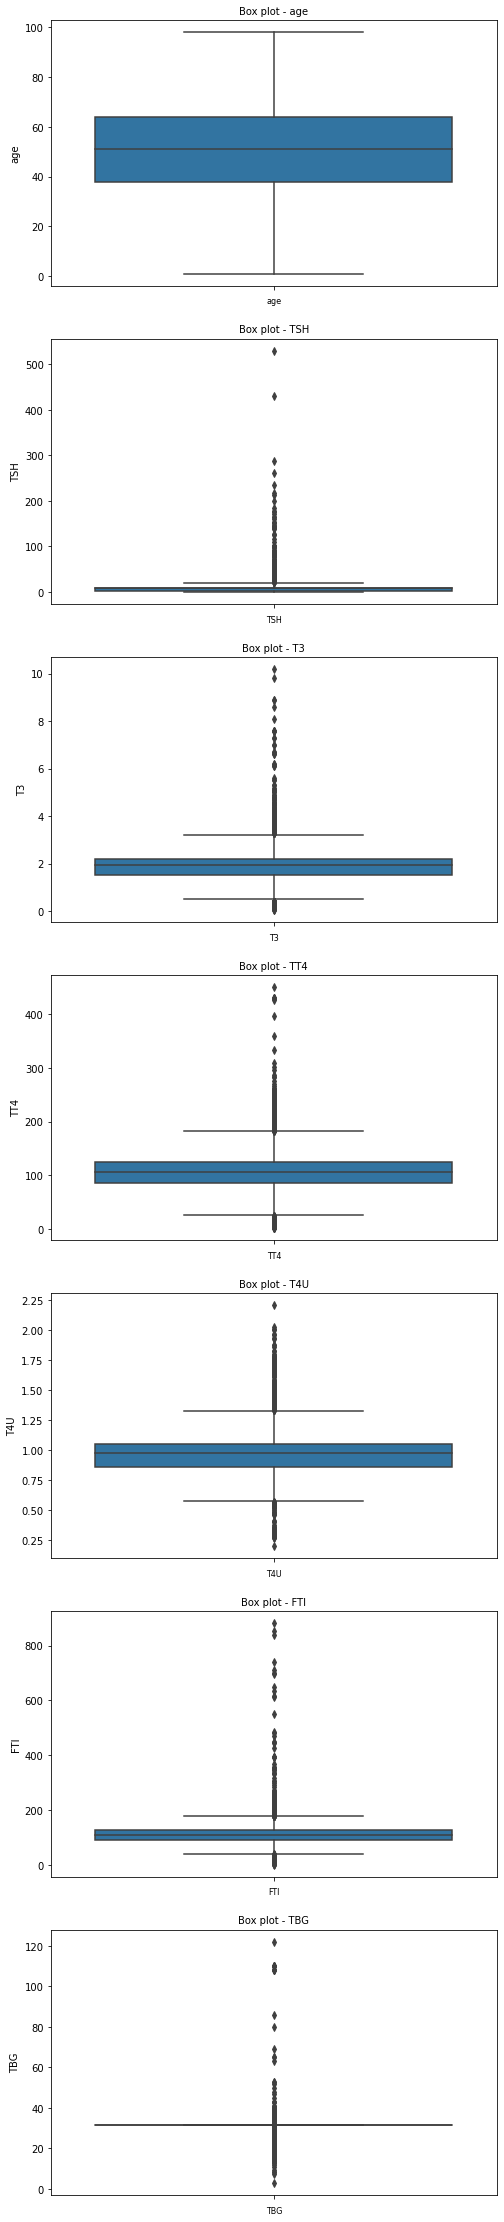

In [19]:
col_names = ['age',	'TSH',	'T3',	'TT4',	'T4U',	'FTI',	'TBG']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = thyroid[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [20]:
# Apart from Age all the other numerical columns contain outliers.
Quantile_1 = thyroid.quantile(.25)
Quantile_3 = thyroid.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((thyroid < Quantile_1 - 1.5* IQR_values) | (thyroid > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

FTI                          291
FTI_measured                   0
T3                           256
T3_measured                    0
T4U                          247
T4U_measured                   0
TBG                          259
TBG_measured                   0
TSH                          171
TSH_measured                   0
TT4                          253
TT4_measured                   0
age                            0
goitre                         0
lithium                        0
on_antithyroid_medication      0
on_thyroxine                   0
pregnant                       0
query_hyperthyroid             0
query_hypothyroid              0
query_on_thyroxine             0
sex                            0
sick                           0
status                         0
thyroid_surgery                0
tumor                          0
dtype: int64

In [21]:
percent_anomalies = (anomalies.sum() / thyroid.shape[0])*100
percent_anomalies

46.69617451786279

The outliers seem like reasonable data that cannot be removed as this would affect the analysis, since the rows involved are roughly 47% of the data.

### Summary Statistics

In [22]:
thyroid.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.132469,8.863393,1.940535,108.850000,0.978871,115.755040,31.403861
std,17.882050,21.720994,0.879764,43.657766,0.216116,57.509312,5.473782
min,1.000000,0.010000,0.050000,2.000000,0.200000,1.400000,3.100000
25%,38.000000,1.300000,1.500000,85.000000,0.860000,92.000000,31.403861
50%,51.000000,8.863393,1.940535,107.000000,0.978871,110.000000,31.403861
75%,64.000000,8.863393,2.200000,124.000000,1.050000,126.000000,31.403861
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [23]:
# Central Tendancies

# mean
for i, col_val in enumerate(col_names):
  print('The mean of ' + str(col_val) + ' is ' + str(thyroid[col_val].mean()))

The mean of age is 51.13246917483402
The mean of TSH is 8.863392559688782
The mean of T3 is 1.9405350628293658
The mean of TT4 is 108.84999999999991
The mean of T4U is 0.9788705801579127
The mean of FTI is 115.7550395596831
The mean of TBG is 31.403861003859742


In [24]:
# median

for i, col_val in enumerate(col_names):
  print('The median of ' + str(col_val) + ' is ' + str(thyroid[col_val].median()))

# the medians are similar to the means and could be due to the cleaning we did to get
# rid of the '?'s

The median of age is 51.0
The median of TSH is 8.863392559689059
The median of T3 is 1.9405350628293472
The median of TT4 is 107.0
The median of T4U is 0.9788705801579107
The median of FTI is 110.0
The median of TBG is 31.403861003861003


In [25]:
# mode

for i, col_val in enumerate(col_names):
  print('The mode of ' + str(col_val) + ' is ' + str(thyroid[col_val].mode()))

# The modes are unimodal showing that the data was gathered from the same population.

The mode of age is 0    51
dtype: int64
The mode of TSH is 0    8.863393
dtype: float64
The mode of T3 is 0    1.940535
dtype: float64
The mode of TT4 is 0    108.85
dtype: float64
The mode of T4U is 0    0.978871
dtype: float64
The mode of FTI is 0    115.75504
dtype: float64
The mode of TBG is 0    31.403861
dtype: float64


In [26]:
# range

for i, col_val in enumerate(col_names):
  print('The range of ' + str(col_val) + ' is ' + str(thyroid[col_val].max()-thyroid[col_val].min()))

The range of age is 97
The range of TSH is 529.99
The range of T3 is 10.149999999999999
The range of TT4 is 448.0
The range of T4U is 2.01
The range of FTI is 879.6
The range of TBG is 118.9


In [27]:
# standard deviation

for i, col_val in enumerate(col_names):
  print('The standard deviation of ' + str(col_val) + ' is ' + str(thyroid[col_val].std()))
  
# variables with higher range showcase higher standard deviation from the mean.

The standard deviation of age is 17.882049906544136
The standard deviation of TSH is 21.7209941711587
The standard deviation of T3 is 0.8797643389741561
The standard deviation of TT4 is 43.65776557429265
The standard deviation of T4U is 0.21611601135336786
The standard deviation of FTI is 57.50931155160271
The standard deviation of TBG is 5.473781916463768


In [28]:
# variance

for i, col_val in enumerate(col_names):
  print('The variance of ' + str(col_val) + ' is ' + str(thyroid[col_val].var()))

# As expected, variables with higher standard deviation, also have higher variance.

The variance of age is 319.76770886013514
The variance of TSH is 471.80158778351023
The variance of T3 is 0.7739852921306337
The variance of TT4 is 1906.0004949398922
The variance of T4U is 0.04670613036328902
The variance of FTI is 3307.3209151393044
The variance of TBG is 29.96228846900576


In [29]:
# skewness

for i, col_val in enumerate(col_names):
  print('The skewness of ' + str(col_val) + ' is ' + str(thyroid[col_val].skew()))

# only age has negative skewness

The skewness of age is -0.17162332567560937
The skewness of TSH is 11.20000393383779
The skewness of T3 is 2.408210339369329
The skewness of TT4 is 1.5715049917109503
The skewness of T4U is 1.0228467774380914
The skewness of FTI is 5.414261918659647
The skewness of TBG is 10.039884375503767


In [30]:
# kurtosis

for i, col_val in enumerate(col_names):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(thyroid[col_val].kurt()))

# only age has negative kurtosis

The kurtosis of age is -0.6265075275337324
The kurtosis of TSH is 185.61569749304073
The kurtosis of T3 is 14.053987221618932
The kurtosis of TT4 is 7.810265536151154
The kurtosis of T4U is 3.866236011769467
The kurtosis of FTI is 52.54235628677467
The kurtosis of TBG is 145.72319748353718


### Univariate Analysis Recommendation

Most of the skewness of the data is positive, indicating a mostly positively skewed dataset on most variables. This means that most distributions have longer tails to the right i.e. right-skewed / leptokurtic. Same goes for kurtosis as The data has mostly positive kurtosis indicating that most variables distributions have heavier tails and taller peaks than the normal distribution.

## BIVARIATE ANALYSIS

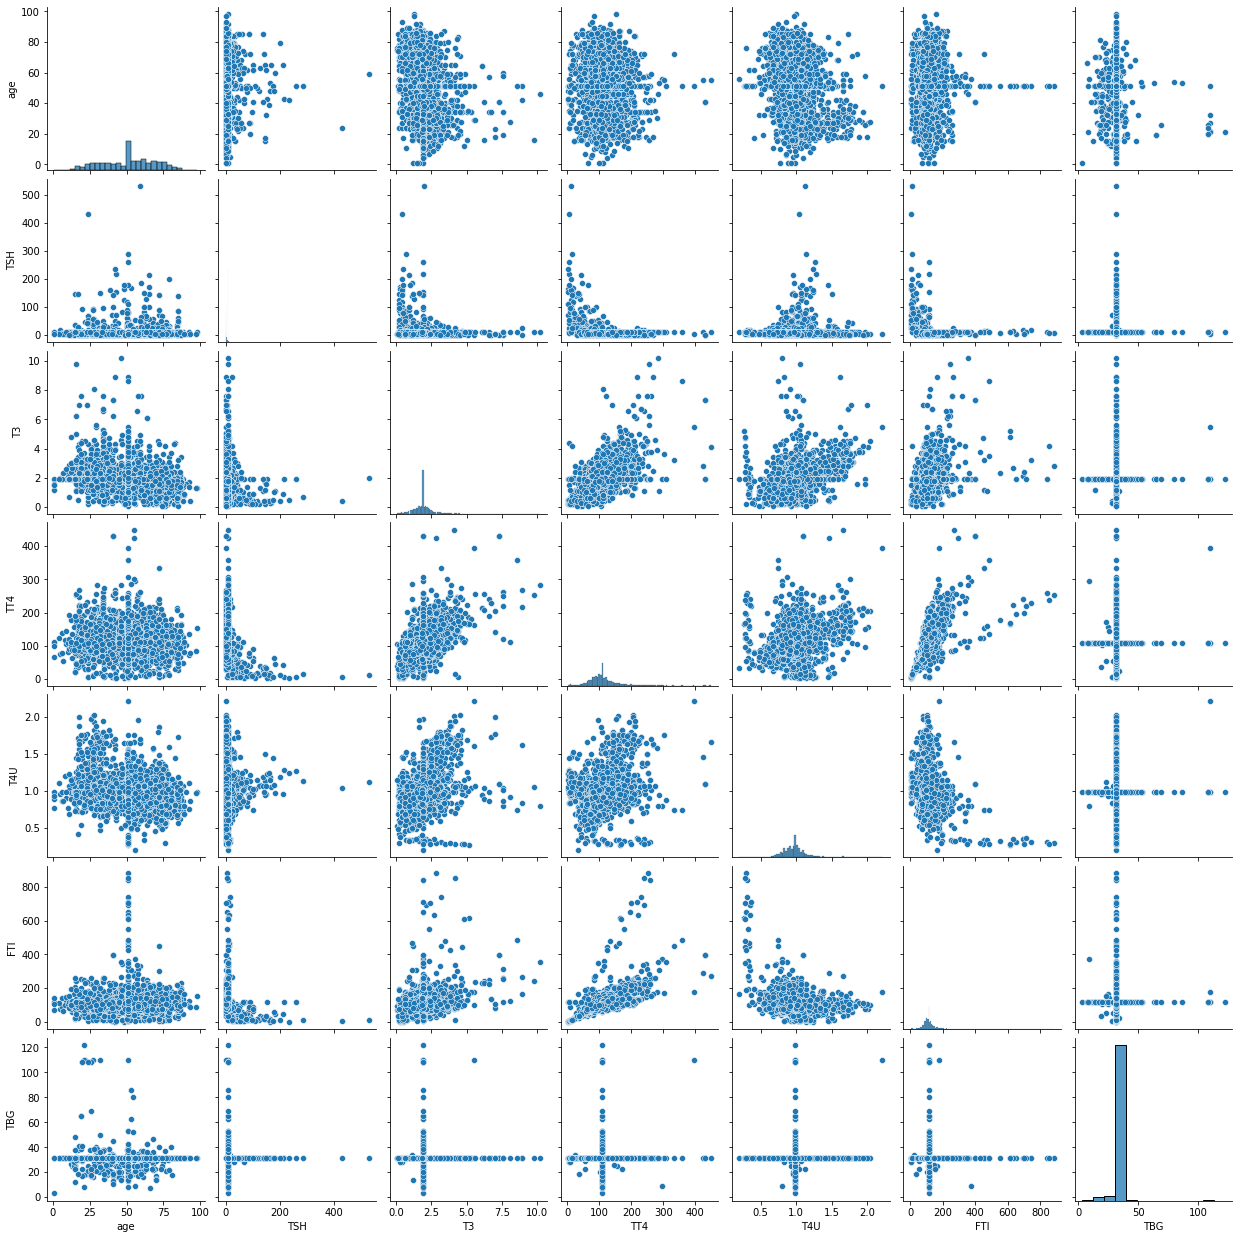

In [31]:
sns.pairplot(thyroid)

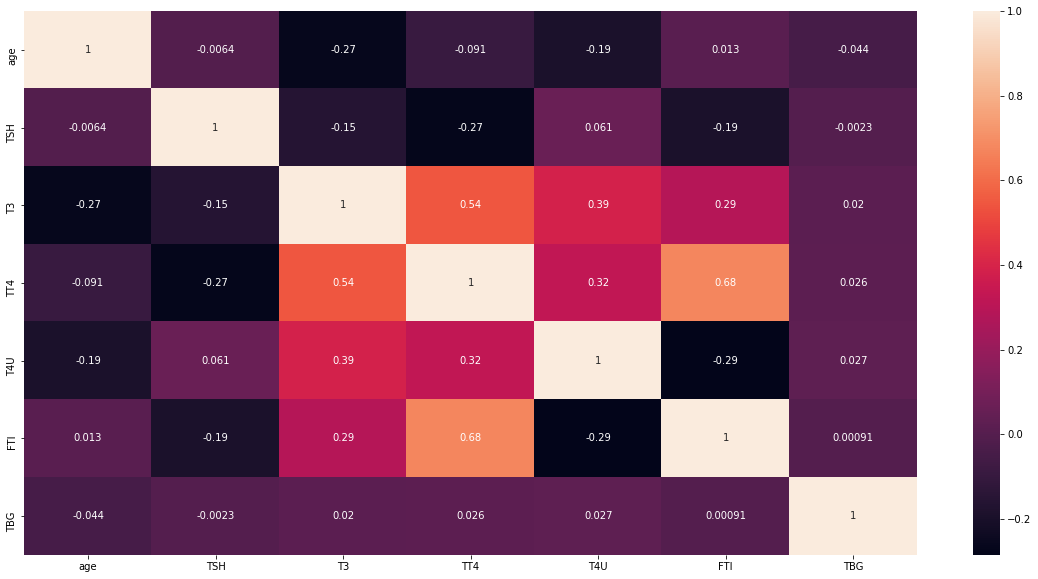

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(thyroid.corr(), annot= True)

### Bivariate Analysis Recommendation

We can see that there's mostly weak correlation between these variables, however there are some that have moderate correlation:
-> T3 and TT4 (0.54)
-> TT4 and FTI (0.68)

## EXPLORATORY DATA ANALYSIS

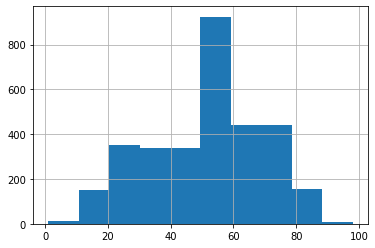

In [33]:
# Since from context hypothyrosis is mostly found in women of older age, lets see some distributions.

thyroid.age.hist(bins=10)

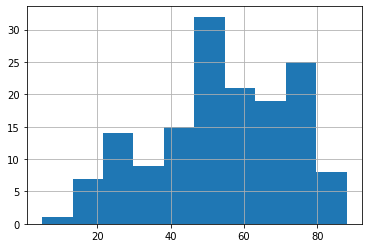

In [34]:
hypo_age = thyroid[thyroid.status != 'negative']
hypo_age.age.hist(bins=10)

# as expected, the more elderly people with hypothyrosis are more than the younger ones.

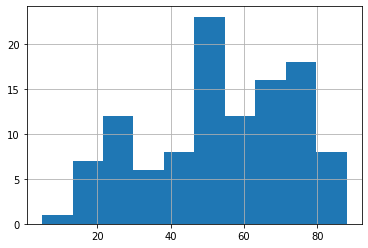

In [35]:
sex_age = hypo_age[hypo_age.sex == 'F']
sex_age.age.hist(bins=10)

# as expected, the more elderly women with hypothyrosis are more than the younger ones.

In [36]:
thyroid.sex.value_counts()

# as expected, there's more women than men with hypothyrosis. 'u' stands for unknown gender.

F    2182
M     908
u      73
Name: sex, dtype: int64

# MODELING 

## a) DECISION TREES

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import  accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [38]:
thyroid.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163.000000,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000,3163,3163.000000
unique,2,NaN,3,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,3012,NaN,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,NaN,2468,NaN,2914,NaN,2915,NaN,2916,NaN,2903,NaN
mean,NaN,51.132469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,1.940535,NaN,108.850000,NaN,0.978871,NaN,115.755040,NaN,31.403861
std,NaN,17.882050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.720994,NaN,0.879764,NaN,43.657766,NaN,0.216116,NaN,57.509312,NaN,5.473782
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.050000,NaN,2.000000,NaN,0.200000,NaN,1.400000,NaN,3.100000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN,31.403861
50%,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,1.940535,NaN,107.000000,NaN,0.978871,NaN,110.000000,NaN,31.403861
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.863393,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,31.403861


In [39]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.000000,y,0.6,y,15.0,y,1.48,y,10.00000,n,31.403861
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.000000,y,1.7,y,19.0,y,1.13,y,17.00000,n,31.403861
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,8.863393,y,0.2,y,4.0,y,1.00,y,115.75504,n,31.403861
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.000000,y,0.4,y,6.0,y,1.04,y,6.00000,n,31.403861
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.300000,y,1.2,y,57.0,y,1.28,y,44.00000,n,31.403861


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

thyroid.status = le.fit_transform(thyroid.status)
thyroid.sex = le.fit_transform(thyroid.sex)
thyroid.on_thyroxine = le.fit_transform(thyroid.on_thyroxine)
thyroid.query_on_thyroxine = le.fit_transform(thyroid.query_on_thyroxine)
thyroid.on_antithyroid_medication = le.fit_transform(thyroid.on_antithyroid_medication)
thyroid.thyroid_surgery = le.fit_transform(thyroid.thyroid_surgery)
thyroid.query_hypothyroid = le.fit_transform(thyroid.query_hypothyroid)
thyroid.query_hyperthyroid = le.fit_transform(thyroid.query_hyperthyroid)
thyroid.pregnant = le.fit_transform(thyroid.pregnant)
thyroid.sick = le.fit_transform(thyroid.sick)
thyroid.tumor = le.fit_transform(thyroid.tumor)
thyroid.lithium = le.fit_transform(thyroid.lithium)
thyroid.goitre = le.fit_transform(thyroid.goitre)
thyroid.TSH_measured = le.fit_transform(thyroid.TSH_measured)
thyroid.T3_measured = le.fit_transform(thyroid.T3_measured)
thyroid.TT4_measured = le.fit_transform(thyroid.TT4_measured)
thyroid.T4U_measured = le.fit_transform(thyroid.T4U_measured)
thyroid.FTI_measured = le.fit_transform(thyroid.FTI_measured)
thyroid.TBG_measured = le.fit_transform(thyroid.TBG_measured)

In [41]:
thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,51.132469,0.333228,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,8.863393,0.780272,1.940535,0.921277,108.850000,0.921593,0.978871,0.921910,115.755040,0.082200,31.403861
std,0.213248,17.882050,0.518103,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,21.720994,0.414128,0.879764,0.269348,43.657766,0.268853,0.216116,0.268356,57.509312,0.274713,5.473782
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.050000,0.000000,2.000000,0.000000,0.200000,0.000000,1.400000,0.000000,3.100000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.300000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000,31.403861
50%,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.863393,1.000000,1.940535,1.000000,107.000000,1.000000,0.978871,1.000000,110.000000,0.000000,31.403861
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.863393,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,31.403861
max,1.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


In [42]:
#Preparing Global Variables

X_ = thyroid.drop(columns = 'status')
y_ = thyroid.status

X = X_.values
y = y_.values

testfeatures = X_.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# This will be our baseline accuracy comparison

Accuracy: 0.9863013698630136
Mean Absolute Error: 0.0136986301369863
Mean Squared Error: 0.0136986301369863
Root Mean Squared Error: 0.11704114719613055


### 1. Random Forest

In [56]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_forest.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.954584
std,0.198617,0.188377
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [57]:
# And now we assess the errors
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_forest))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_forest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_forest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))

Mean Absolute Error: 0.020084299262381453
Mean Squared Error: 0.01217913593256059
Root Mean Squared Error: 0.11035912256157436


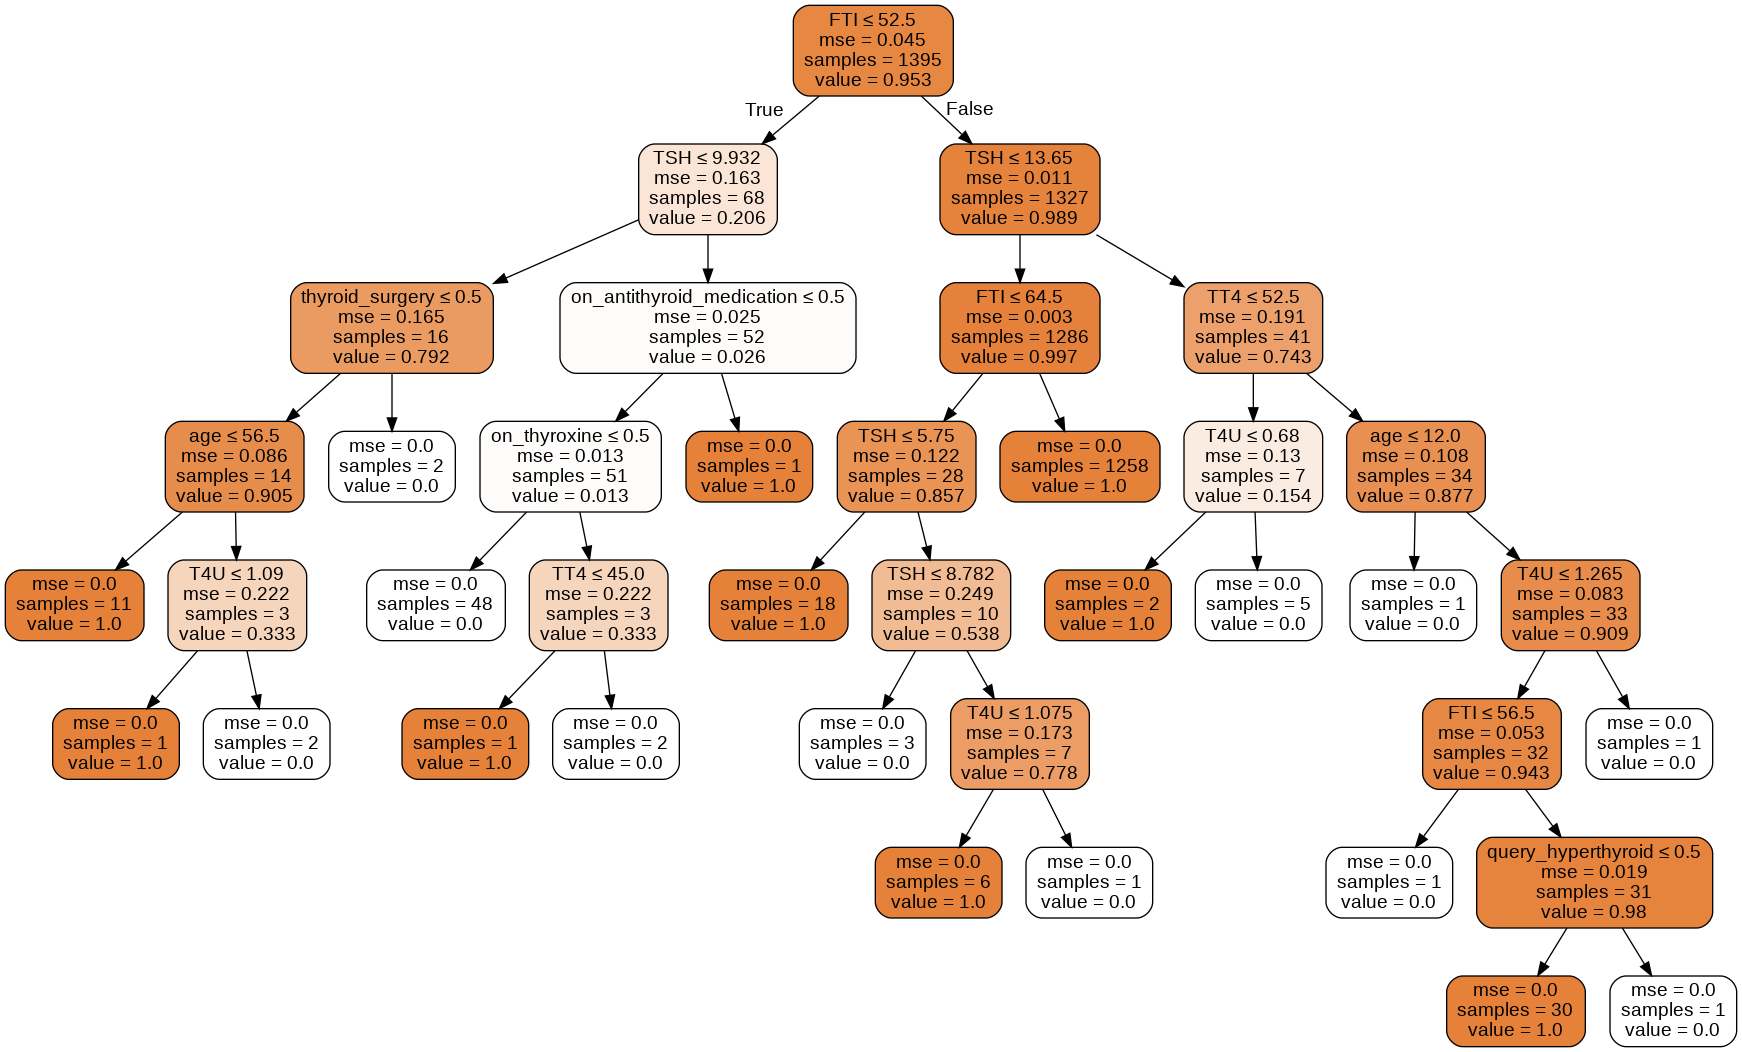

In [58]:
# Let's see what tree #5 looks like:

dot_data = StringIO()

tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = testfeatures, class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('baseline_forest.png')
Image(graph.create_png())

# Notice that some of the features exhibited here were never included in our past model. 
# We'll often see these features if you display other trees, but the trees will have slight differences of features or tests in multiple nodes.

In [59]:
# Visualizing feature importance

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(testfeatures, importances)]

# We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.62
Variable: TSH                  Importance: 0.19
Variable: TT4                  Importance: 0.06
Variable: T4U                  Importance: 0.06
Variable: age                  Importance: 0.03
Variable: thyroid_surgery      Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: query_hyperthyroid   Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: TT4_measured         Importance: 0.0


Text(0.5, 1.0, 'Variable Importances')

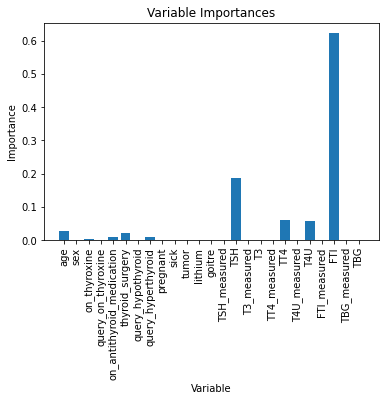

In [60]:
# Plotting the above

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, testfeatures, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

From this, we can see the important features are FTI, TSH, TT4, T4U and T3 which are tests for hormones
that will tell if a person has hypothyroid. Age is also a major factor as was seen in the Exploratory Data Analysis section.

---

### Tuning the Random Forest

In [61]:
# Tuning our Forest with the most important features and max_depth.

y_Forest = y.copy()
X_Forest_ = thyroid[['FTI', 'TSH', 'TT4', 'age', 'T4U', 'T3', 'thyroid_surgery']]
X_Forest = X_Forest_.values

X_train, X_test, y_train, y_test = train_test_split(X_Forest, y_Forest, test_size=0.3, random_state=0)


Forest = RandomForestRegressor(max_depth=5)
Forest = Forest.fit(X_train, y_train)

y_pred_Forest = Forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_Forest.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.957974
std,0.198617,0.177196
min,0.000000,0.000000
25%,1.000000,0.999936
50%,1.000000,0.999936
75%,1.000000,0.999936
max,1.000000,0.999936


In [62]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Forest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Forest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Forest)))

Mean Absolute Error: 0.020834300932216186
Mean Squared Error: 0.01193992258870766
Root Mean Squared Error: 0.10926995281735807


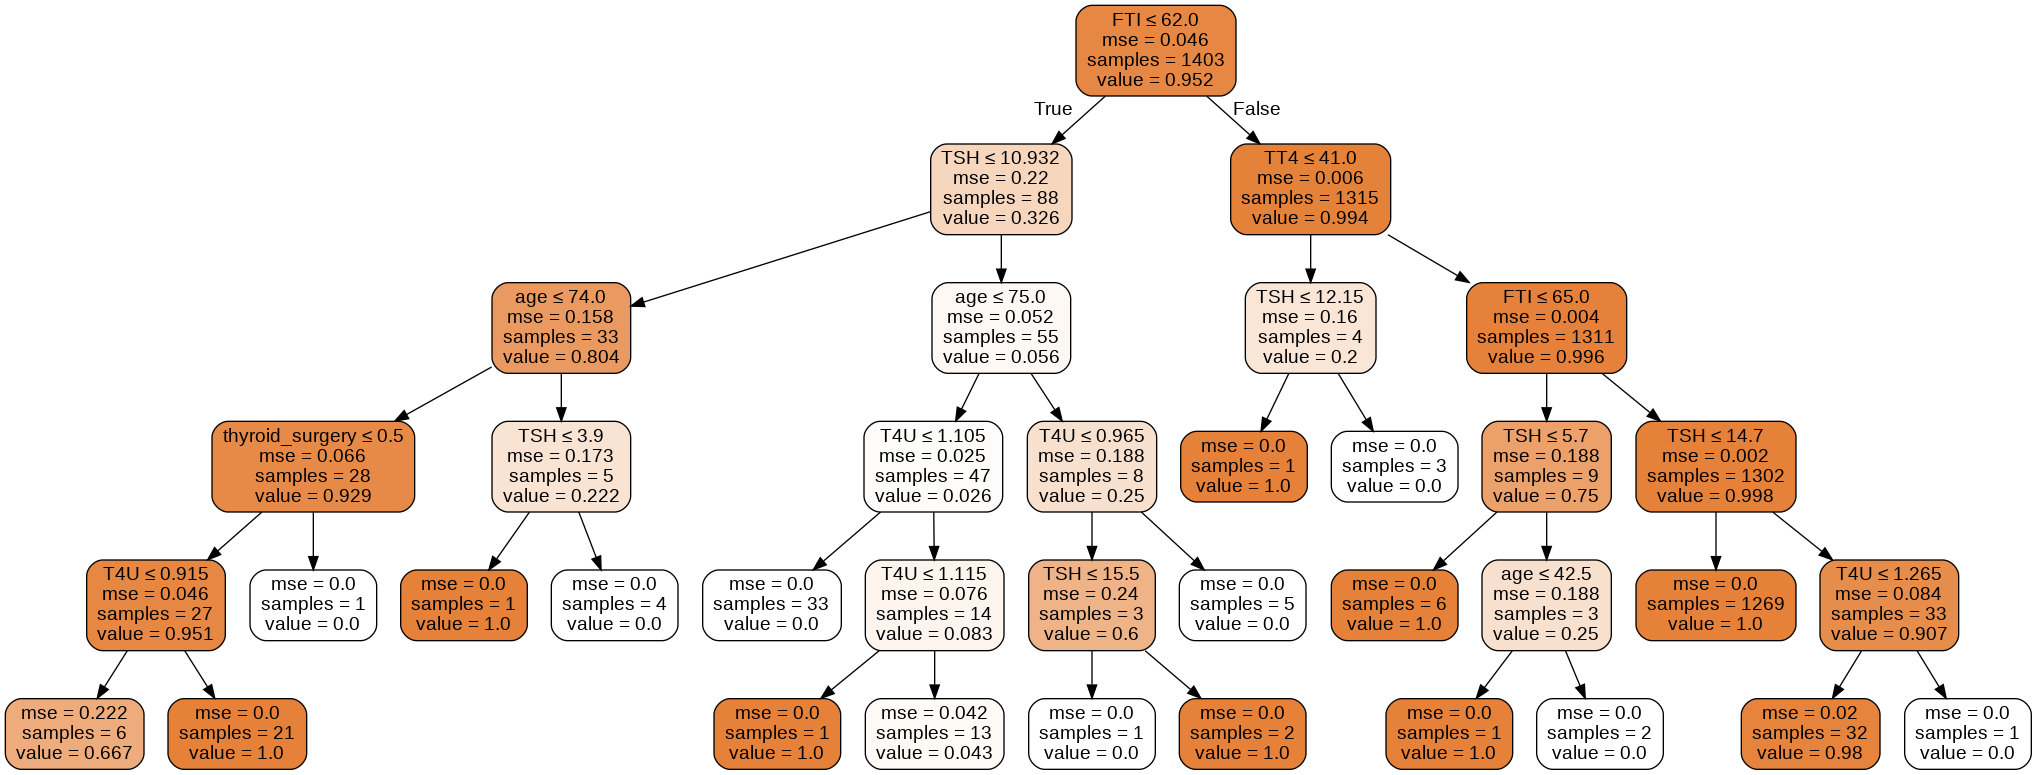

In [63]:
dot_data = StringIO()
# pick a specific tree from the forest
Tree = Forest.estimators_[5]

export_graphviz(Tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_Forest_.columns, class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tuned_forest.png')
Image(graph.create_png())

In [64]:
# Visualizing the new feature importance

importances_Forest = list(Tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_Forest_.columns, importances_Forest)]

# We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.61
Variable: TSH                  Importance: 0.24
Variable: T4U                  Importance: 0.06
Variable: age                  Importance: 0.05
Variable: TT4                  Importance: 0.03
Variable: thyroid_surgery      Importance: 0.01
Variable: T3                   Importance: 0.0


Text(0.5, 1.0, 'Variable Importances')

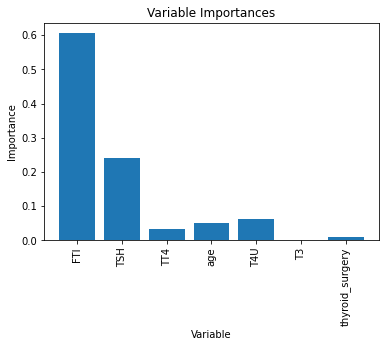

In [65]:
# Plotting the above

# list of x locations for plotting
x_values_Forest = list(range(len(importances_Forest)))

plt.bar(x_values_Forest, importances_Forest, orientation = 'vertical')
plt.xticks(x_values_Forest, X_Forest_.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

# We've reduced the important features to just 6, that we can use for prediction.

The MAEs of the Random Forests are worse than the Decision Trees, Howeever both their MSEs and RMSE scores are better. Upon tuning, the MSE and RMSE slightly improve on thr Random Forest Model achivieng the best scores so far.

### 2. Gradient Boost

In [66]:
X_grad = X_.values
y_grad = y_.values

testfeatures = X_.columns

X_train, X_test, y_train, y_test = train_test_split(X_grad, y_grad, test_size=0.3, random_state=0)

In [67]:
# We set different learning rates, so that we can compare the performance of the classifier's 
# performance at different learning rates.

learning_rate = [0.001,0.01,0.1,0.5,0.75,1]

for lr in learning_rate:
  grad = GradientBoostingClassifier(learning_rate=lr)
  grad.fit(X_train, y_train)

  print('For Learning rate: ', lr)
  print('Training Accuracy score is: ', grad.score(X_train, y_train))
  print('Validation Accuracy score is: ', grad.score(X_test, y_test))

For Learning rate:  0.001
Training Accuracy score is:  0.9494128274616079
Validation Accuracy score is:  0.958904109589041
For Learning rate:  0.01
Training Accuracy score is:  0.991869918699187
Validation Accuracy score is:  0.9884088514225501
For Learning rate:  0.1
Training Accuracy score is:  1.0
Validation Accuracy score is:  0.9810326659641728
For Learning rate:  0.5
Training Accuracy score is:  1.0
Validation Accuracy score is:  0.982086406743941
For Learning rate:  0.75
Training Accuracy score is:  0.9850948509485095
Validation Accuracy score is:  0.9778714436248683
For Learning rate:  1
Training Accuracy score is:  0.943089430894309
Validation Accuracy score is:  0.946259220231823


### Tuning Gradient Boost

In [68]:
# Validation Accuracy is of our main importance, but since Learning rate 0.5 gives us the best 
# Training Accuracy and a very good Validation Accuracy, we'll use this learning accuracy.

# Let's create a new classifier and specify the best learning rate we discovered.

grad_best = GradientBoostingClassifier(learning_rate= 0.5)
grad_best.fit(X_train, y_train)

grad_pred = grad_best.predict(X_test)

# Checking its accuracy using a confusion matrix

print(confusion_matrix(y_test, grad_pred))

# This is a very accurate model since 33+899 predictions were correct, which is over 98%.

[[ 33   6]
 [ 11 899]]


In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, grad_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad_pred)))

Accuracy: 0.982086406743941
Mean Absolute Error: 0.01791359325605901
Mean Squared Error: 0.01791359325605901
Root Mean Squared Error: 0.1338416723448232


The MAE is better than the Random Forest Model, however, the MSE and RMSE are worse.

### Decision Trees Recommendation

The accuracies of the models are all above 98%, however, using the MSE values which would help in precision when predicting value, in order to see if the data was overfitted, the tuned Random Forest is our choice, since it has the lowest MSE. The lower the MSE value the better and 0 means the model is perfect.

## b) SUPPORT VECTOR MACHINES

In [70]:
# For this section we'll need to find out the important features prior to applying our svm models

thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,1,30.000000,1,0.6,1,15.0,1,1.48,1,10.00000,0,31.403861
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,1,145.000000,1,1.7,1,19.0,1,1.13,1,17.00000,0,31.403861
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,8.863393,1,0.2,1,4.0,1,1.00,1,115.75504,0,31.403861
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,430.000000,1,0.4,1,6.0,1,1.04,1,6.00000,0,31.403861
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,1,7.300000,1,1.2,1,57.0,1,1.28,1,44.00000,0,31.403861


In [71]:
# Checking for Multicolinearity

thyroid_correlation = thyroid.corr()

pd.DataFrame(np.linalg.inv(thyroid_correlation.values), index = thyroid_correlation.index, 
             columns=thyroid_correlation.columns)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,1.687676,0.040112,-0.017852,0.011639,-0.029812,-0.025300,0.041808,0.005314,0.057716,-0.033885,-0.030534,-0.028410,-0.018844,0.034591,0.127019,0.767935,0.006748,-0.022288,0.052630,-0.719845,-0.160787,0.403055,0.511103,0.252578,0.390360,0.012714
age,0.040112,1.180168,0.071693,0.014871,-0.005421,0.039577,0.024771,-0.040749,0.026591,0.113992,-0.023455,0.060506,0.022734,-0.005062,-0.160963,0.041248,-0.136403,0.297510,-0.490740,-0.110315,0.933763,0.114866,-0.357484,-0.024048,0.047449,0.041366
sex,-0.017852,0.071693,1.193632,0.092955,-0.024757,0.028466,0.035157,0.063478,0.057685,0.013205,0.011638,0.036835,0.013043,0.083650,0.070611,0.045116,-0.087313,-0.094470,-0.212412,0.426186,0.845902,0.106248,-0.724710,-0.415452,0.015699,0.019040
on_thyroxine,0.011639,0.014871,0.092955,1.191057,0.026433,0.006316,-0.028006,-0.041304,0.112022,0.014256,0.062273,0.028276,0.011252,0.027868,-0.222720,-0.094262,0.369721,0.102321,-0.215995,-0.433597,1.001436,0.084924,-0.796504,0.117846,0.110944,0.012524
query_on_thyroxine,-0.029812,-0.005421,-0.024757,0.026433,1.053027,0.006530,-0.028527,0.017433,0.048432,0.000823,0.022085,-0.039571,0.000073,-0.009927,0.244259,-0.015196,0.087103,0.005327,-0.257504,-0.035009,-0.108516,0.048258,0.276576,0.057977,0.171940,-0.004923
on_antithyroid_medication,-0.025300,0.039577,0.028466,0.006316,0.006530,1.027007,0.012774,0.032197,-0.117934,0.016506,0.012854,0.016380,0.004273,0.036887,-0.038396,-0.003342,0.007186,-0.067619,-0.037004,0.076185,0.088164,-0.013485,0.043737,-0.005128,0.042736,0.015016
thyroid_surgery,0.041808,0.024771,0.035157,-0.028006,-0.028527,0.012774,1.011518,0.010360,-0.032178,0.022204,0.032264,0.022261,0.006543,0.027071,-0.071463,0.027714,0.004963,0.008691,-0.026293,0.043771,0.077173,-0.036907,0.026516,-0.022149,0.041353,0.020816
query_hypothyroid,0.005314,-0.040749,0.063478,-0.041304,0.017433,0.032197,0.010360,1.030401,-0.001674,0.019010,0.054502,0.031216,-0.039518,0.026196,-0.057863,-0.035013,0.073751,0.035636,-0.085325,0.033611,0.066924,-0.064757,0.071930,-0.019597,0.093185,0.011599
query_hyperthyroid,0.057716,0.026591,0.057685,0.112022,0.048432,-0.117934,-0.032178,-0.001674,1.106450,-0.036560,0.038995,0.040839,0.008141,-0.013970,0.183839,-0.009187,-0.077249,-0.135471,-0.183961,-0.227923,0.194857,0.111096,-0.190406,0.100619,-0.179132,0.006431
pregnant,-0.033885,0.113992,0.013205,0.014256,0.000823,0.016506,0.022204,0.019010,-0.036560,1.162648,0.006584,0.010009,0.021145,-0.060010,-0.014427,0.014147,-0.076502,-0.022182,-0.140097,0.092540,0.226975,-0.419518,0.004079,-0.157724,0.068494,-0.083027


In [72]:
# TT4_measured , T4U_measured, FTI_measured, TBG_measured and TT4 all have VIFs way above 5,
# Let's remove them

thyroid_new = thyroid.drop(columns=['TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TT4'])
new_thyroid_corr = thyroid_new.corr()

pd.DataFrame(np.linalg.inv(new_thyroid_corr.values), index = new_thyroid_corr.index, 
             columns=new_thyroid_corr.columns)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,T4U,FTI,TBG
status,1.580360,0.023305,0.042927,-0.048301,-0.033060,-0.016478,0.046454,0.008976,0.029478,-0.022717,-0.038123,-0.019565,-0.011185,0.037922,0.118759,0.817430,0.011889,-0.101407,0.059936,-0.267441,0.004479
age,0.023305,1.174927,0.081340,0.005608,-0.001438,0.039863,0.024707,-0.039699,0.021826,0.114839,-0.024851,0.058170,0.023759,-0.005915,-0.140666,0.048732,-0.128799,0.285440,0.063321,-0.102130,0.039694
sex,0.042927,0.081340,1.151154,0.120453,-0.034217,0.024705,0.033259,0.058755,0.076234,0.006446,0.015822,0.021531,0.008494,0.084625,0.016981,0.014501,-0.109547,-0.051826,0.311081,-0.106987,0.024209
on_thyroxine,-0.048301,0.005608,0.120453,1.144210,0.010104,0.015459,-0.022505,-0.040672,0.092578,0.022917,0.057764,0.019804,0.015890,0.033501,-0.301122,-0.063442,0.348116,0.051427,-0.123524,-0.196570,0.008774
query_on_thyroxine,-0.033060,-0.001438,-0.034217,0.010104,1.021810,0.013069,-0.024059,0.012893,0.047131,0.003977,0.022015,-0.045334,0.000737,-0.002084,0.089010,-0.013121,0.037256,-0.005195,0.030481,0.027972,-0.003279
on_antithyroid_medication,-0.016478,0.039863,0.024705,0.015459,0.013069,1.024299,0.010985,0.032297,-0.113783,0.014182,0.013468,0.016916,0.003384,0.034972,-0.006745,-0.009229,0.016780,-0.058532,0.024181,0.051376,0.015250
thyroid_surgery,0.046454,0.024707,0.033259,-0.022505,-0.024059,0.010985,1.010314,0.010445,-0.029588,0.020699,0.032582,0.022548,0.006020,0.025795,-0.049793,0.024214,0.011620,0.013939,-0.015039,0.010551,0.020862
query_hypothyroid,0.008976,-0.039699,0.058755,-0.040672,0.012893,0.032297,0.010445,1.029166,0.000565,0.018411,0.054789,0.029449,-0.039853,0.027201,-0.081073,-0.037922,0.065972,0.037806,-0.048033,0.004481,0.012111
query_hyperthyroid,0.029478,0.021826,0.076234,0.092578,0.047131,-0.113783,-0.029588,0.000565,1.094063,-0.031646,0.036898,0.043245,0.010584,-0.013038,0.180311,0.008311,-0.076275,-0.159250,-0.000069,-0.065466,0.004413
pregnant,-0.022717,0.114839,0.006446,0.022917,0.003977,0.014182,0.020699,0.018411,-0.031646,1.160213,0.007354,0.008822,0.020095,-0.061172,-0.000003,0.006979,-0.072674,-0.012265,-0.373904,-0.089688,-0.082427


In [74]:
thyroid_new.corr()

 
# FTI from Decision trees indicated the most relevance, we can pick those two from the above list.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,T4U,FTI,TBG
status,1.000000,-0.035496,0.023808,0.033652,2.978529e-02,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,5.632014e-03,-0.010847,-8.912872e-02,-5.615870e-01,-6.868200e-02,1.835968e-01,-0.080978,0.298567,1.141066e-03
age,-0.035496,1.000000,-0.004766,-0.001206,-1.978936e-02,-0.058945,-0.012274,0.048393,-0.087725,-0.159258,0.064677,-0.063030,-2.128942e-02,-0.037078,2.012507e-01,-6.391220e-03,1.765911e-01,-2.688700e-01,-0.192630,0.013014,-4.428816e-02
sex,0.023808,-0.004766,1.000000,-0.125604,3.582330e-02,-0.026636,-0.036469,-0.076622,-0.061817,-0.082967,0.010552,-0.012721,-1.618068e-02,-0.087589,2.741760e-02,-3.590308e-02,9.815648e-02,-4.012837e-02,-0.289907,0.156382,-2.118585e-02
on_thyroxine,0.033652,-0.001206,-0.125604,1.000000,-1.381979e-02,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-1.038988e-02,-0.022790,7.371133e-02,2.386725e-02,-1.616563e-01,2.056380e-02,0.071156,0.113503,-5.364221e-03
query_on_thyroxine,0.029785,-0.019789,0.035823,-0.013820,1.000000e+00,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-3.346136e-03,0.003869,-1.080531e-01,-3.627371e-03,-8.712329e-02,-1.521937e-02,-0.035235,-0.005238,9.229881e-18
on_antithyroid_medication,0.013020,-0.058945,-0.026636,-0.024433,-1.543187e-02,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-2.917968e-03,-0.020852,-2.944865e-02,-3.338214e-03,-1.848694e-02,6.306376e-02,0.025672,-0.018093,-1.222866e-02
thyroid_surgery,-0.041868,-0.012274,-0.036469,0.029355,1.616210e-02,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-4.637989e-03,-0.022962,3.689035e-02,9.298579e-03,7.928734e-03,-8.796734e-03,0.023627,-0.027542,-1.970477e-02
query_hypothyroid,-0.047477,0.048393,-0.076622,0.070498,-1.997101e-02,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,4.018102e-02,-0.024248,5.255328e-02,5.646979e-02,-2.027678e-02,-4.050152e-02,0.045435,-0.039136,-1.257184e-02
query_hyperthyroid,0.025616,-0.087725,-0.061817,-0.088877,-3.837537e-02,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-7.256287e-03,0.043595,-1.372360e-01,-2.485823e-02,-3.327552e-02,1.887896e-01,0.071692,0.076581,1.199557e-03
pregnant,0.021306,-0.159258,-0.082967,-0.001168,-1.896401e-02,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-3.585850e-03,0.078337,8.422148e-03,-1.529956e-02,3.193077e-02,2.013491e-01,0.325947,-0.007981,8.516410e-02


In [75]:
thyroid_new.status = le.inverse_transform(thyroid_new.status)
thyroid_new.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,T4U,FTI,TBG
0,n,72,1,0,0,0,0,0,0,0,0,0,0,0,1,30.000000,1,0.6,1.48,10.00000,31.403861
1,n,15,0,1,0,0,0,0,0,0,0,0,0,0,1,145.000000,1,1.7,1.13,17.00000,31.403861
2,n,24,1,0,0,0,0,0,0,0,0,0,0,0,1,8.863393,1,0.2,1.00,115.75504,31.403861
3,n,24,0,0,0,0,0,0,0,0,0,0,0,0,1,430.000000,1,0.4,1.04,6.00000,31.403861
4,n,77,1,0,0,0,0,0,0,0,0,0,0,0,1,7.300000,1,1.2,1.28,44.00000,31.403861


In [76]:
thyroid_new.status.unique()

array(['n', 'y'], dtype=object)

In [77]:
thyroid_new.status = thyroid_new.status.replace(to_replace=['n','y'], value = ['hypothyroid','negative'])
thyroid_new.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,T4U,FTI,TBG
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,1,30.000000,1,0.6,1.48,10.00000,31.403861
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,1,145.000000,1,1.7,1.13,17.00000,31.403861
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,8.863393,1,0.2,1.00,115.75504,31.403861
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,1,430.000000,1,0.4,1.04,6.00000,31.403861
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,1,7.300000,1,1.2,1.28,44.00000,31.403861


### Linear Function Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


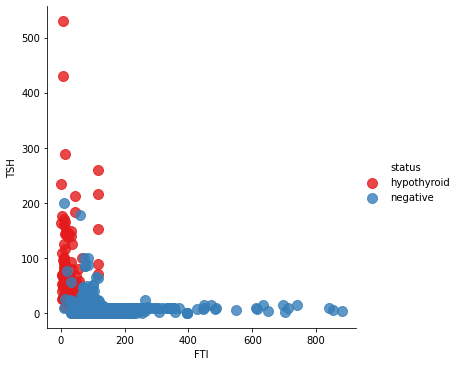

In [78]:
sns.lmplot('FTI', 'TSH', data=thyroid_new, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 100});

In [79]:
# Specify the input for the model

hypo = thyroid_new[['FTI', 'TSH']].to_numpy()

type_label = np.where(thyroid_new['status']=='hypothyroid',1,0)


# Fit the model
model = SVC(kernel= 'linear')
model.fit(hypo,type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


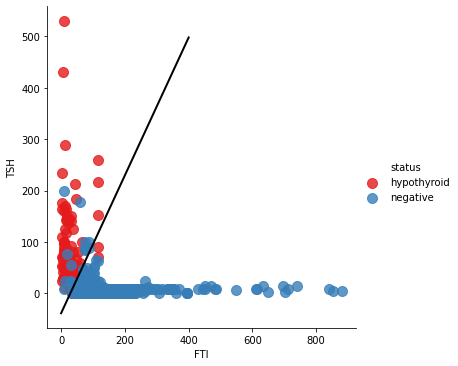

In [80]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers 
# from the largest number of the FTI vlaues and the smallest number of the FTI values.  

xx = np.linspace(0, 400)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('FTI', 'TSH', data=thyroid_new, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 100})
plt.plot(xx, yy, linewidth=2, color='black')

In [81]:
# Splitting the data to see if the model will work.

X_svm = thyroid_new[['TSH', 'FTI']]
y_svm = np.where(thyroid_new['status'] == 'hypothyroid', 1,0)

X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=0)

model_lin = SVC(kernel= 'linear')

model_lin.fit(X_train,y_train)

y_pred_lin = model_lin.predict(X_test)

model_lin_accuracy = accuracy_score(y_test, y_pred_lin)
print('Accuracy: ', model_lin_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

Accuracy:  0.9768177028451
Mean Absolute Error: 0.023182297154899896
Mean Squared Error: 0.023182297154899896
Root Mean Squared Error: 0.1522573385912807


In [82]:
confusion_matrix(y_test, y_pred_lin)

# This will be our baseline model to compare with.

array([[901,   9],
       [ 13,  26]])

### Polynomial Function Model

In [83]:
poly = SVC(kernel= 'poly', degree=3)
poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
y_pred_poly = poly.predict(X_test)

model_poly_accuracy = accuracy_score(y_test, y_pred_poly)
print('Accuracy: ', model_poly_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Accuracy:  0.9747102212855637
Mean Absolute Error: 0.02528977871443625
Mean Squared Error: 0.02528977871443625
Root Mean Squared Error: 0.15902760362413895


In [85]:
confusion_matrix(y_test, y_pred_poly)

# all the values i.e. Accuracy, MAE, MSE and RMSE are worse than the linear model's

array([[900,  10],
       [ 14,  25]])

### Radial Basis Function (rbf) Model

In [86]:
rbf = SVC(kernel= 'rbf')

rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
y_pred_rbf = rbf.predict(X_test)

model_rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print('Accuracy: ', model_rbf_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

Accuracy:  0.9778714436248683
Mean Absolute Error: 0.022128556375131718
Mean Squared Error: 0.022128556375131718
Root Mean Squared Error: 0.14875670195030447


In [88]:
confusion_matrix(y_test, y_pred_rbf)

# This is the best performing svm model.

array([[902,   8],
       [ 13,  26]])

Since rbf performed the best out of the 3 kernels, we'll select it for tuning

### Tuning rbf Model

In [89]:
Rbf = SVC(kernel= 'rbf', gamma='auto')

Rbf.fit(X_train, y_train)

y_pred_Rbf = Rbf.predict(X_test)

model_Rbf_accuracy = accuracy_score(y_test, y_pred_Rbf)
print('Accuracy: ', model_Rbf_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Rbf)))

Accuracy:  0.964172813487882
Mean Absolute Error: 0.03582718651211802
Mean Squared Error: 0.03582718651211802
Root Mean Squared Error: 0.18928070824074497


In [90]:
confusion_matrix(y_test, y_pred_Rbf)

array([[910,   0],
       [ 34,   5]])

### SVM Recommendation

After tuning with gamma, the results worsened, therefore we will stick with the best performing svm rbf model that we had initially developped.

## c) SVM WITH MORE FEATURES

In [91]:
X_Svm = thyroid_new.drop(columns=['status'])
y_Svm = np.where(thyroid_new['status'] == 'hypothyroid', 1,0)

X_train, X_test, y_train, y_test = train_test_split(X_Svm, y_Svm, test_size=0.3, random_state=0)

RBF = SVC(kernel= 'rbf')

RBF.fit(X_train, y_train)

y_pred_RBF = RBF.predict(X_test)

model_RBF_accuracy = accuracy_score(y_test, y_pred_RBF)
print('Accuracy: ', model_RBF_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RBF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RBF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RBF)))

Accuracy:  0.9778714436248683
Mean Absolute Error: 0.022128556375131718
Mean Squared Error: 0.022128556375131718
Root Mean Squared Error: 0.14875670195030447


In [92]:
confusion_matrix(y_test, y_pred_RBF)

array([[903,   7],
       [ 14,  25]])

The results are similar to those of just 2 features

# CONCLUSION

The best performing model from the Decision Trees was the tuned Random Forest Classifier while the best SVM was the untuned rbf kernel model. However, the tuned Random Forest Classifier performed the best and should be considered appropriate for this data.

# CHALLENGING THE SOLUTION

In [93]:
# Since Sigmoid is best used for binary classifications i.e. 0 and 1, and we have
# 2 classes to predict, let's see if the results are any better.

X_Sig = thyroid_new.drop(columns=['status'])
y_Sig = np.where(thyroid_new['status'] == 'hypothyroid', 1,0)

X_train, X_test, y_train, y_test = train_test_split(X_Sig, y_Sig, test_size=0.3, random_state=0)

Sig = SVC(kernel= 'sigmoid')

Sig.fit(X_train, y_train)

y_pred_Sig = Sig.predict(X_test)

model_Sig_accuracy = accuracy_score(y_test, y_pred_Sig)
print('Accuracy: ', model_Sig_accuracy)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Sig))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Sig))  

Accuracy:  0.9536354056902002
Mean Absolute Error: 0.04636459430979979
Mean Squared Error: 0.04636459430979979


In [94]:
confusion_matrix(y_test, y_pred_Sig)

array([[887,  23],
       [ 21,  18]])

This is one of the worst models and ensures that the Random Forest Model we had developped was the best option.

# RECOMMENDATION

The Random Forest Classifier performed the best, however, the svm models can be improved by performing PCA to determine fewer components to use as features to the model. This could improve the prediction results and could be the next step of the project.

---

# FOLLOW UP QUESTIONS

## a) Did we have the right data?

Yes, as our accuracy scores were all above 95%

## b) Do we need other data to answer our question?

Yes, since we had too many questionmarks that we had to fill in using various methods appropriate to each column

## c) Did we have the right question?

Yes we did since the deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism and Hypothyroidism may not cause noticeable symptoms in the early stages